# Preliminary Set-up

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [3]:
%pwd

'/content'

In [2]:
%cd drive/MyDrive/QLI_Lab_Project/video_processing

/content/drive/MyDrive/QLI_Lab_Project/video_processing


# Part 1
- Sum frames in a video of each angle from 0º to 180º at 10º increments (skipping 60º to 100º) and see if they match up with the simulations to determine if the experiment seems set-up correctly.


In [212]:
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
import time
import pandas as pd

root = Path("./")
videos_path = root / "Videos"
str(videos_path)

'Videos'

In [6]:
root = Path("./")
videos_path = root / "Videos"
str(videos_path)
for vid_path in sorted(videos_path.glob("*")):
    print(vid_path)
    # cap = cv2.VideoCapture(str(vid_path))
    # print(cap.get(cv2.CAP_PROP_FPS))

Videos/0.MOV
Videos/10.MOV
Videos/120.MOV
Videos/130.MOV
Videos/140.MOV
Videos/150.MOV
Videos/160.MOV
Videos/170.MOV
Videos/175.MOV
Videos/176.MOV
Videos/177.MOV
Videos/178.mov
Videos/179.MOV
Videos/20.MOV
Videos/30.MOV
Videos/40.MOV
Videos/50.MOV
Videos/60.MOV
Videos/70.MOV


In [68]:
def get_layered_imgs_RGB(vid_path, time=None):
    cap = cv2.VideoCapture(str(vid_path))
    success,image = cap.read()
    layered_imgs = np.zeros((1080,1920,3))
    fps = round(cap.get(cv2.CAP_PROP_FPS))
    # print(fps)
    frame_num = 0
    if time == None:
        time = np.inf
    start_frame_num = 0
    while success and ((frame_num - start_frame_num) / fps) < time:
        # start_frame_num = (cap.get(cv2.CAP_PROP_FRAME_COUNT) - fps * 41)
        start_frame_num = (cap.get(cv2.CAP_PROP_FRAME_COUNT) - fps * 61)
        if frame_num >= start_frame_num:
            layered_imgs += image
        success,image = cap.read()
        frame_num += 1
    layered_imgs[layered_imgs > 255] = 255
    # print(layered_imgs.dtype)
    layered_imgs = np.round(layered_imgs).astype('uint16')
    layered_imgs_RGB = cv2.cvtColor(layered_imgs, cv2.COLOR_BGR2RGB) 
    return layered_imgs_RGB

Videos/178.mov
178


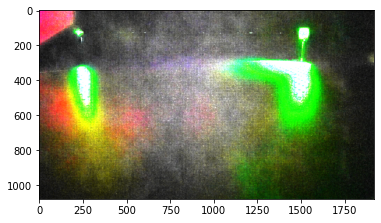

In [72]:
time = 10
for vid_path in sorted(videos_path.glob("*")):
    print(vid_path)
    theta = int(vid_path.stem)
    print(theta)
    layered_imgs_RGB = get_layered_imgs_RGB(vid_path, time=time)
    plt.imshow(layered_imgs_RGB)
    plt.savefig(f'layered_imgs/theta_{theta}_time_{time}_2.jpg')
    np.save(f'layered_npys/theta_{theta}_time_{time}_2.npy', layered_imgs_RGB)

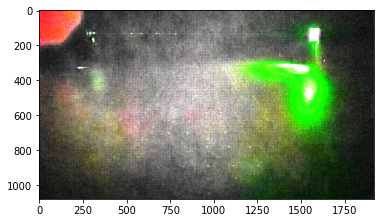

In [5]:
# loading saved images
x = np.load("layered_npys/theta_175_time_10.npy")
plt.imshow(x)
plt.show()

# Cropping

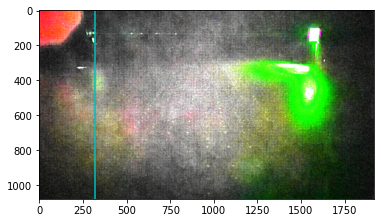

In [27]:
# crop theta_175_time_10 image to not show laser source
x = np.load("layered_npys/theta_175_time_10.npy")
plt.vlines(320, 0, 1080, colors="c")
plt.imshow(x)
plt.show()

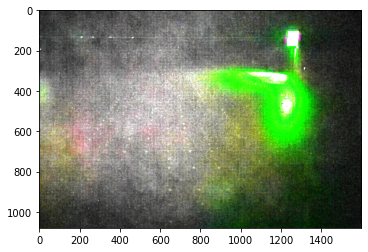

In [28]:
plt.imshow(x[:, 320:])
plt.show()

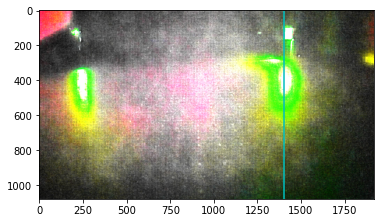

In [30]:
# crop theta_0_time_10 image to not show beam dump
x = np.load("layered_npys/theta_0_time_10.npy")
plt.vlines(1400, 0, 1080, colors="c")
plt.imshow(x)
plt.show()

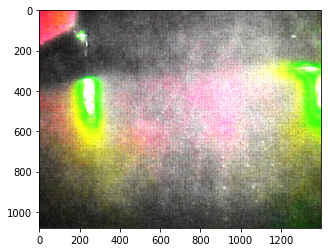

In [32]:
plt.imshow(x[:, :1400])
plt.show()

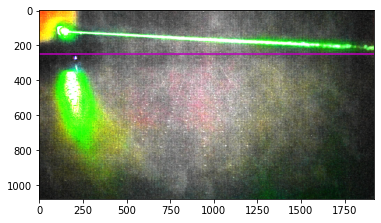

In [43]:
x = np.load("layered_npys/theta_120_time_10.npy")
plt.hlines(250, 0, 1920, colors="m")
plt.imshow(x)
plt.show()

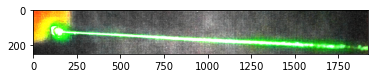

In [44]:
plt.imshow(x[:250, :])
plt.show()

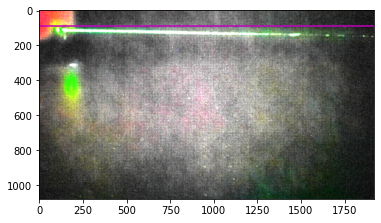

In [50]:
x = np.load("layered_npys/theta_130_time_10.npy")
plt.hlines(90, 0, 1920, colors="m")
plt.imshow(x)
plt.show()

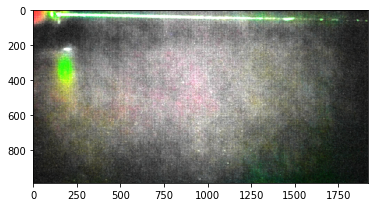

In [51]:
plt.imshow(x[90:, :])
plt.show()

In [52]:
x_min = 320 # min x coordinate
x_max = 1400 # max x coordinate
y_min = 90 # min y coordinate
y_max = 250 # max y coordinate

In [34]:
npys_path = root / "layered_npys"
npys_path

PosixPath('layered_npys')

layered_npys/theta_0_time_10.npy
layered_npys/theta_10_time_10.npy
layered_npys/theta_120_time_10.npy
layered_npys/theta_130_time_10.npy
layered_npys/theta_140_time_10.npy
layered_npys/theta_150_time_10.npy
layered_npys/theta_160_time_10.npy
layered_npys/theta_170_time_10.npy
layered_npys/theta_175_time_10.npy
layered_npys/theta_176_time_10.npy
layered_npys/theta_177_time_10.npy
layered_npys/theta_178_time_10.npy
layered_npys/theta_179_time_10.npy
layered_npys/theta_20_time_10.npy
layered_npys/theta_30_time_10.npy
layered_npys/theta_40_time_10.npy
layered_npys/theta_50_time_10.npy


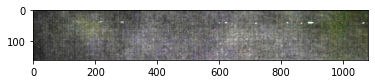

In [79]:
# save cropped images to new folders
for npy_path in sorted(npys_path.glob("*")):
    # print(npy_path)
    if npy_path.stem.split("_")[-1] == "10":
        print(npy_path)
        img = np.load(str(npy_path))
        plt.imshow(img)
        cropped_img = img[y_min:y_max, x_min:x_max]
        plt.imshow(cropped_img)
        plt.savefig(f'cropped_layered_imgs/{npy_path.stem}.jpg')
        np.save(f'cropped_layered_npys/{npy_path.stem}.npy', cropped_img)

# Getting pixel positions for laser beam

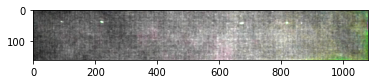

In [89]:
img = np.load("cropped_layered_npys/theta_0_time_10.npy")
threshold = 255
plt.imshow(img, cmap="Greys")
plt.show()

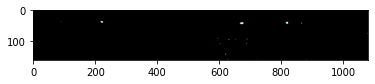

In [95]:
img = np.load("cropped_layered_npys/theta_0_time_10.npy")
threshold = 255
img[img < threshold] = 0
img[img >= threshold] = 255
plt.imshow(img)
plt.show()

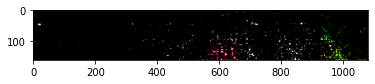

In [126]:
img = np.load("cropped_layered_npys/theta_40_time_10.npy")
threshold = 170
img[img < threshold] = 0
img[img >= threshold] = 255
plt.imshow(img)
plt.show()

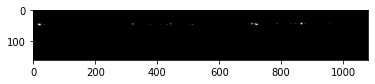

In [142]:
npy_path = Path("cropped_layered_npys/theta_40_time_10.npy")
img = np.load(npy_path)
threshold = 170
img[img < threshold] = 0
img[img >= threshold] = 255
img[:40] = 0
img[50:] = 0
plt.imshow(img)
plt.savefig(f'filtered_imgs/{npy_path.stem}.jpg')
np.save(f'filtered_npys/{npy_path.stem}.npy', img)

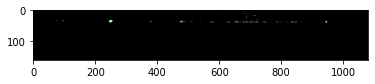

In [143]:
npy_path = Path("cropped_layered_npys/theta_179_time_10.npy")
img = np.load(npy_path)
threshold = 200
img[img < threshold] = 0
img[img >= threshold] = 255
img[40:] = 0
plt.imshow(img)
plt.savefig(f'filtered_imgs/{npy_path.stem}.jpg')
np.save(f'filtered_npys/{npy_path.stem}.npy', img)

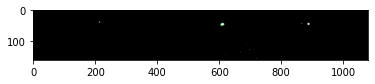

In [135]:
npy_path = Path("cropped_layered_npys/theta_177_time_10.npy")
img = np.load(npy_path)
threshold = 255
img[img < threshold] = 0
img[img >= threshold] = 255
plt.imshow(img)
plt.show()

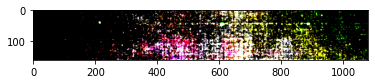

In [134]:
npy_path = Path("cropped_layered_npys/theta_177_time_10.npy")
img = np.load(npy_path)
threshold = 150
img[img < threshold] = 0
img[img >= threshold] = 255
plt.imshow(img)
plt.show()

cropped_layered_npys/theta_0_time_10.npy
cropped_layered_npys/theta_10_time_10.npy
cropped_layered_npys/theta_120_time_10.npy
cropped_layered_npys/theta_130_time_10.npy
cropped_layered_npys/theta_140_time_10.npy
cropped_layered_npys/theta_150_time_10.npy
cropped_layered_npys/theta_160_time_10.npy
cropped_layered_npys/theta_170_time_10.npy
cropped_layered_npys/theta_175_time_10.npy
cropped_layered_npys/theta_176_time_10.npy
cropped_layered_npys/theta_177_time_10.npy
cropped_layered_npys/theta_178_time_10.npy
cropped_layered_npys/theta_179_time_10.npy
cropped_layered_npys/theta_20_time_10.npy
cropped_layered_npys/theta_30_time_10.npy
cropped_layered_npys/theta_40_time_10.npy
cropped_layered_npys/theta_50_time_10.npy


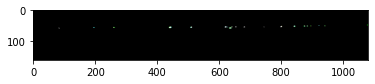

In [141]:
# save filtered images to new folders
threshold = 255
cropped_npys_path = root / "cropped_layered_npys"
for npy_path in sorted(cropped_npys_path.glob("*")):
    print(npy_path)
    img = np.load(str(npy_path))
    img[img < threshold] = 0
    img[img >= threshold] = 255
    plt.imshow(img)
    plt.savefig(f'filtered_imgs/{npy_path.stem}.jpg')
    np.save(f'filtered_npys/{npy_path.stem}.npy', img)

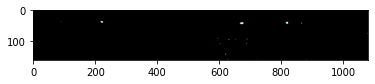

In [146]:
npy_path = Path("filtered_npys/theta_0_time_10.npy")
img = np.load(npy_path)
plt.imshow(img)
plt.show()

In [155]:
beam_indices = np.where(img == 255) # 0, 1, 2

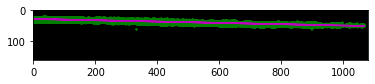

In [230]:
# Testing how to detect the laser
npy_path = Path("filtered_npys/theta_130_time_10.npy")
img = np.load(npy_path)
img[60:] = 0 # get rid of noise that's below the laser <= this only works with theta != 120
beam_indices = np.where(img == 255)
x = beam_indices[1]
y = beam_indices[0]
plt.scatter(x, y, color='g', s=1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b, color="m") # plot the line of best fit for the points on the laser beam
plt.imshow(img)
plt.show()

In [249]:
filtered_npys_path = root / "filtered_npys"
beam_equations = [[], [], []] # stores theta values in first list, m values in 2nd list, b values in 3rd list
for npy_path in sorted(filtered_npys_path.glob("*")):
    print(npy_path)
    theta = int(npy_path.stem.split("_")[1])
    # print("theta", theta)
    filtered_img = np.load(str(npy_path))
    cropped_img = np.load(str("cropped_layered_npys/" + npy_path.stem + ".npy"))
    if str(npy_path) != "filtered_npys/theta_120_time_10.npy":
        filtered_img[60:] = 0 # get rid of noise that's below the laser <= only works if theta != 120
    beam_indices = np.where(filtered_img == 255)
    x = beam_indices[1]
    y = beam_indices[0]
    # plt.scatter(x, y, color='g', s=1) # brightly shows the points of the laser beam
    m, b = np.polyfit(x, y, 1)
    x_axis = np.arange(img.shape[1])
    plt.plot(x_axis, m * x_axis + b, color='c', alpha=0.2) # plot the line of best fit for the points on the laser beam
    plt.imshow(cropped_img)
    plt.savefig(f'detected_beam_imgs/{npy_path.stem}.jpg')
    plt.clf()
    beam_equations[0].append(theta)
    beam_equations[1].append(m)
    beam_equations[2].append(b)

filtered_npys/theta_0_time_10.npy
filtered_npys/theta_10_time_10.npy
filtered_npys/theta_120_time_10.npy
filtered_npys/theta_130_time_10.npy
filtered_npys/theta_140_time_10.npy
filtered_npys/theta_150_time_10.npy
filtered_npys/theta_160_time_10.npy
filtered_npys/theta_170_time_10.npy
filtered_npys/theta_175_time_10.npy
filtered_npys/theta_176_time_10.npy
filtered_npys/theta_177_time_10.npy
filtered_npys/theta_178_time_10.npy
filtered_npys/theta_179_time_10.npy
filtered_npys/theta_20_time_10.npy
filtered_npys/theta_30_time_10.npy
filtered_npys/theta_40_time_10.npy
filtered_npys/theta_50_time_10.npy


<Figure size 432x288 with 0 Axes>

In [250]:
beam_equations = pd.DataFrame({'theta': beam_equations[0], 
                               'm': beam_equations[1], 
                               'b': beam_equations[2]})
print(beam_equations)

    theta         m          b
0       0  0.006131  36.445392
1      10  0.004634  35.196241
2     120  0.053690  43.162414
3     130  0.021225  27.682526
4     140  0.014040  40.950504
5     150  0.009787  32.747954
6     160  0.009463  37.536733
7     170  0.006275  34.960906
8     175  0.006173  42.330971
9     176  0.003869  40.668540
10    177  0.004478  41.366966
11    178  0.003131  37.644779
12    179  0.001623  34.728591
13     20  0.002380  30.787351
14     30  0.001355  41.833688
15     40 -0.002778  45.796764
16     50 -0.007953  58.751148


In [252]:
beam_equations.sort_values(by=['theta'], inplace=True)
beam_equations

,theta,m,b
0,0,0.006131,36.445392
1,10,0.004634,35.196241
13,20,0.002380,30.787351
14,30,0.001355,41.833688
15,40,-0.002778,45.796764
16,50,-0.007953,58.751148
2,120,0.053690,43.162414
3,130,0.021225,27.682526
4,140,0.014040,40.950504
5,150,0.009787,32.747954


In [253]:
beam_equations.to_csv("beam_equations.csv")

[3.00000000e+00 1.30000000e+02 2.12246394e-02 2.76825263e+01]


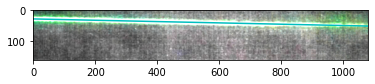

In [295]:
# loading in csv values to ensure they're valid
theta = 130
npy_path = Path(f'cropped_layered_npys/theta_{theta}_time_10.npy')
img = np.load(npy_path)
beam_equations = pd.read_csv("beam_equations.csv")
x = np.arange(img.shape[1])
row = beam_equations[beam_equations['theta'] == theta].values[0]
print(row)
m = row[2]
b = row[3]
plt.plot(x, m * x + b, color='c')
plt.imshow(img)
plt.show()

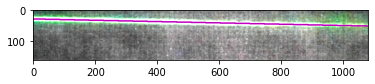

In [296]:
# testing how to extract pixel positions of the laser beam from linear equation for beam
pixel_positions = np.round(np.array([x, (m * x + b)]))
x_pixel_positions = pixel_positions[0]
y_pixel_positions = pixel_positions[1]
plt.plot(x_pixel_positions, y_pixel_positions, color='m')
plt.imshow(img)
plt.show()

In [353]:
img.shape

(160, 1080, 3)

In [345]:
# store pixel positions of laser beam for each 10 second sample image of theta
beam_equations = pd.read_csv("beam_equations.csv")
npy_path = Path(f'cropped_layered_npys/theta_0_time_10.npy')
img = np.load(npy_path)
x = np.arange(img.shape[1])
for index, row in beam_equations.iterrows():
    theta = int(row['theta'])
    m = row['m']
    b = row['b']
    # print(theta, m, b)

    # store beam pixel positions based on the linear equation for beam
    pixel_positions = np.round(np.array([x, (m * x + b)])).astype(int)
    np.save(f'beam_pixel_positions_npys/{theta}.npy', pixel_positions)

1079
43


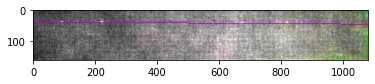

In [355]:
# check that positions were stored correctly (they are)
theta = 0
npy_path = Path(f'cropped_layered_npys/theta_{theta}_time_10.npy')
img = np.load(npy_path)
pixel_positions = np.load(f'beam_pixel_positions_npys/{theta}.npy')
x_pixel_positions = pixel_positions[0]
y_pixel_positions = pixel_positions[1]
print(x_pixel_positions.max())
print(y_pixel_positions.max())
plt.scatter(x_pixel_positions, y_pixel_positions, color='m', alpha=0.4, s=0.1)
plt.imshow(img)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


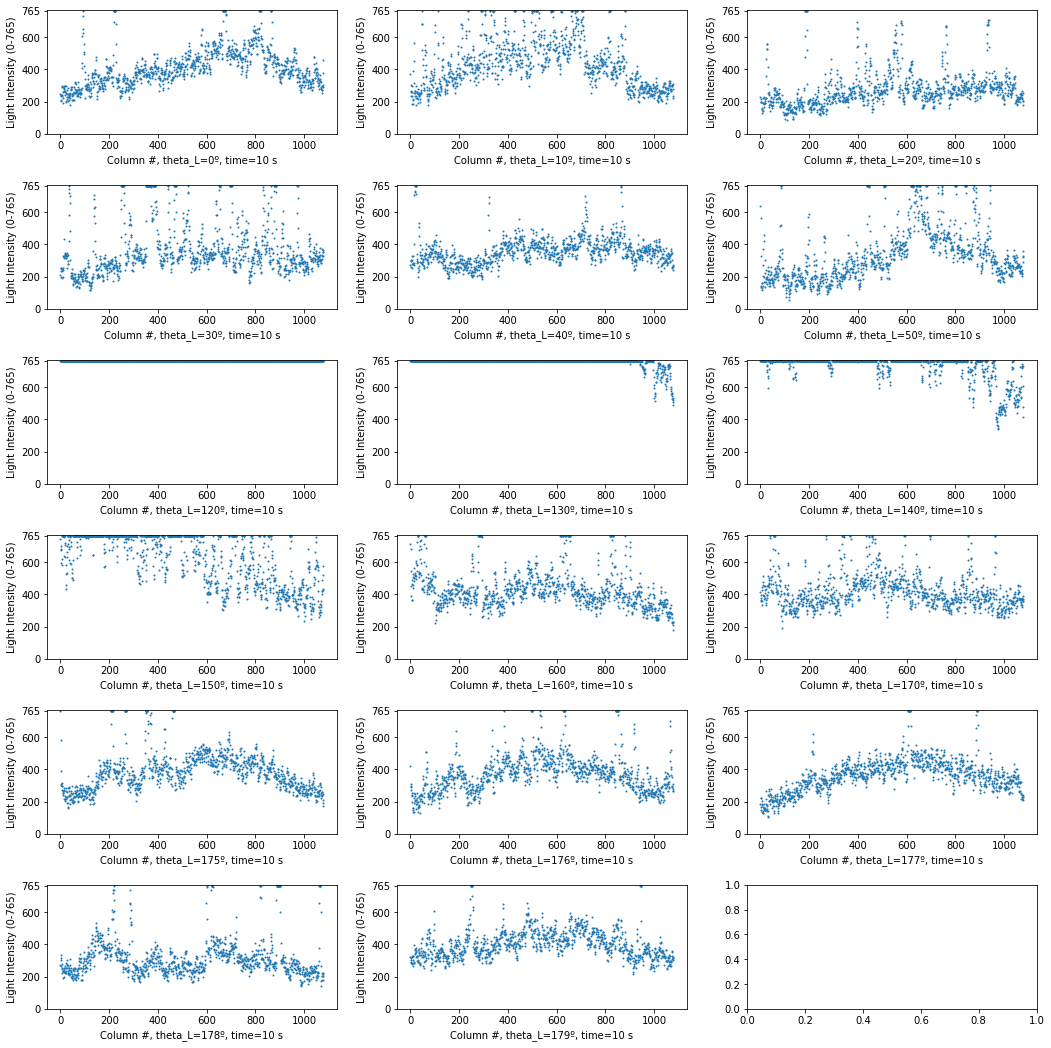

In [378]:
# for each layered image
    # graph the scattered light intensities w/ x-axis as pixel column number or angle
# Compare with simulations
thetas = [0, 10, 20, 30, 40, 50, 120, 130, 140, 150, 160, 170, 175, 176, 177, 178, 179]
fig, ax = plt.subplots(6, 3, figsize=(15, 15))
fig.tight_layout(pad=3)
idx = 0
theta = thetas[idx]
for i in range(0, 6):
    for j in range(0, 3):
        if idx < len(thetas):
            theta = thetas[idx]
            npy_path = Path(f'cropped_layered_npys/theta_{theta}_time_10.npy')
            img = np.load(npy_path)
            pixel_positions = np.load(f'beam_pixel_positions_npys/{theta}.npy')
            x_pixel_positions = pixel_positions[0]
            y_pixel_positions = pixel_positions[1]
            scattered_light_intensities = np.sum(img[[y_pixel_positions, x_pixel_positions]], axis=1)
            # print(scattered_light_intensities.max())
            ax[i][j].set_yticks([0, 200, 400, 600, 765])
            ax[i][j].set_ylim(0, 770)
            ax[i, j].scatter(x_pixel_positions, scattered_light_intensities, s=1)
            ax[i][j].set_xlabel(f'Column #, theta_L={theta}º, time=10 s')
            ax[i][j].set_ylabel("Light Intensity (0-765)")
        idx += 1
plt.savefig("scattered_light_intensity_graphs/time_10") # save plot as .png file
plt.show()

# Debugging Zone
- Videos producing weird layered images?

In [21]:
# test out layering a video
vid_path = "Videos/0.MOV"
cap = cv2.VideoCapture(str(vid_path))
success,image = cap.read()
layered_imgs = np.zeros((1080,1920,3))

while success: 
    layered_imgs += image
    success,image = cap.read()
    break
    # print('Added a new frame: ', success)

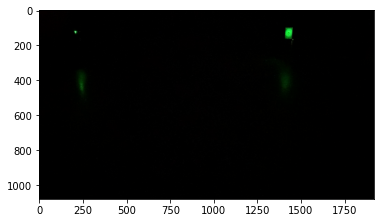

In [22]:
# show the first frame in the video
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
plt.imshow(image_RGB)
plt.show()

In [ ]:
# plot the layered image
layered_imgs[layered_imgs > 255] = 255
print(layered_imgs.dtype)
layered_imgs = np.round(layered_imgs).astype('uint16')
layered_imgs_RGB = cv2.cvtColor(layered_imgs, cv2.COLOR_BGR2RGB) 
plt.imshow(layered_imgs_RGB)
plt.show()